In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


**Load dataset**

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Housing.csv",sep=';')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Convert categorical columns ("yes"/"no") to numeric (1/0)**

In [4]:
yes_no_map={'yes': 1, 'no': 0}
binary_cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in binary_cols:
    df[col] = df[col].map(yes_no_map)

df=pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


**Change columns name and type**

In [5]:
df.rename(columns={'furnishingstatus_semi-furnished': 'semi_furn','furnishingstatus_unfurnished': 'unfurn'}, inplace=True)
df['semi_furn'] = df['semi_furn'].astype(int)
df['unfurn'] = df['unfurn'].astype(int)



In [37]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi_furn,unfurn
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


**MLR model**

In [6]:
#independent variables
x= df.drop('price', axis=1) 

#dependent variable 
y= df['price']               


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse= mean_squared_error(y_test, y_pred)  
rmse= mse ** 0.5                         
r2=r2_score(y_test, y_pred)             


print(f"RMSE:{rmse:.2f}")              
print(f"R2 Score:{r2:.4f}")             


coeff_df = pd.DataFrame({'Feature': x.columns,'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
intercept = model.intercept_
print(coeff_df)

RMSE:1324506.96
R2 Score:0.6529
            Feature   Coefficient
2         bathrooms  1.094445e+06
8   airconditioning  7.914267e+05
7   hotwaterheating  6.846499e+05
10         prefarea  6.298906e+05
3           stories  4.074766e+05
6          basement  3.902512e+05
4          mainroad  3.679199e+05
5         guestroom  2.316100e+05
9           parking  2.248419e+05
1          bedrooms  7.677870e+04
0              area  2.359688e+02
11        semi_furn -1.268818e+05
12           unfurn -4.136451e+05


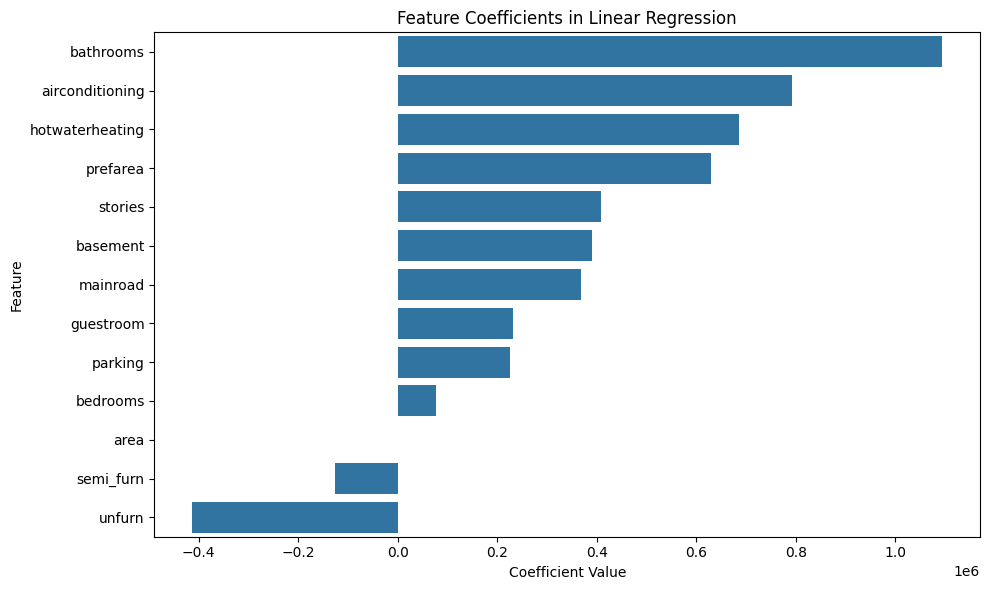

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Coefficients in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Linear regression equation**

In [8]:
equation = f"y = {intercept:.2f}"
for coef, feature in zip(model.coef_, x.columns):
    sign = " + " if coef >= 0 else " - "
    equation += f"{sign}{abs(coef):.2f}*{feature}"

print("Regression equation:")
print(equation)


Regression equation:
y = 260032.36 + 235.97*area + 76778.70*bedrooms + 1094444.79*bathrooms + 407476.59*stories + 367919.95*mainroad + 231610.04*guestroom + 390251.18*basement + 684649.89*hotwaterheating + 791426.74*airconditioning + 224841.91*parking + 629890.57*prefarea - 126881.82*semi_furn - 413645.06*unfurn


**New house predict**

In [11]:

new_house = [7500, 4, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0]
predicted_price = model.intercept_
for coef, val in zip(model.coef_, new_house):
    predicted_price += coef * val

print(f"Predicted house price: {predicted_price:.2f}")


Predicted house price: 7969928.21
